# Name:-

## Parth Suhas Mane

## Problem Statement
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 



## Importing Libraries

In [45]:
# improrting the necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the dataset
data = pd.read_csv('Company_Data.csv')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


## EDA & Visualization

In [3]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


Data types of each column is correctly identified

In [4]:
#check duplicated values
data.duplicated().sum()

0

There are no duplicate rows in the dataset

In [5]:
#check correlation
data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


<AxesSubplot:>

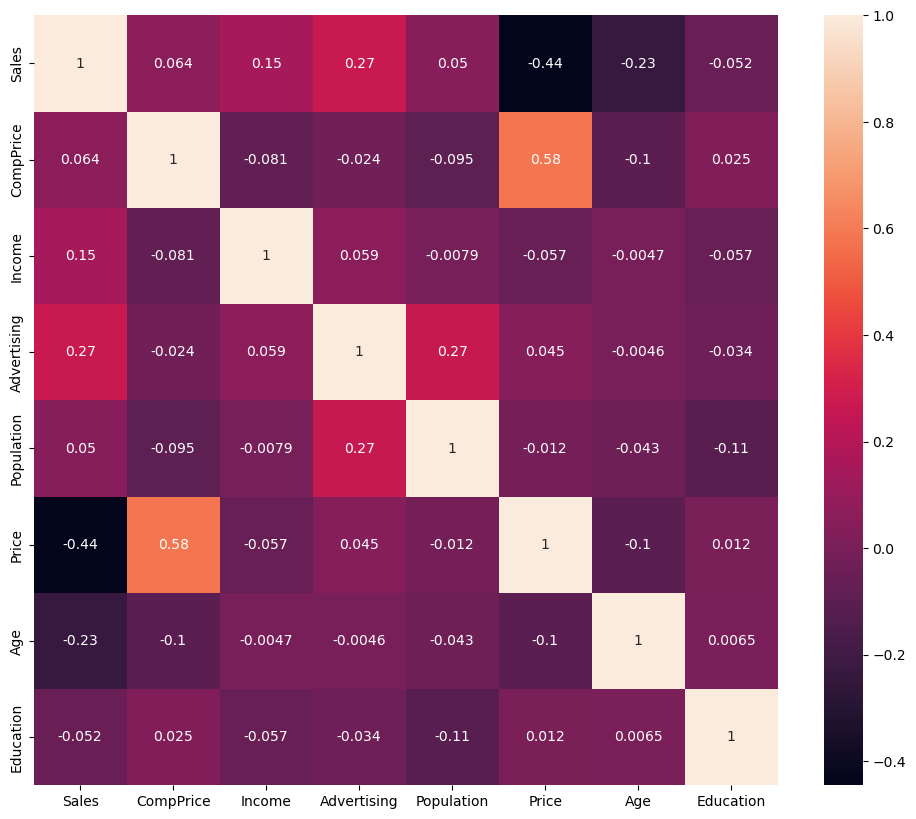

In [6]:
#Plot heatmap to see rectangular data as a color-encoded matrix.
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)

Competitor Price(Price charged by competitor at each location) & Price (Price company charges for car seats at each site) these two features are highly correlated.

<AxesSubplot:>

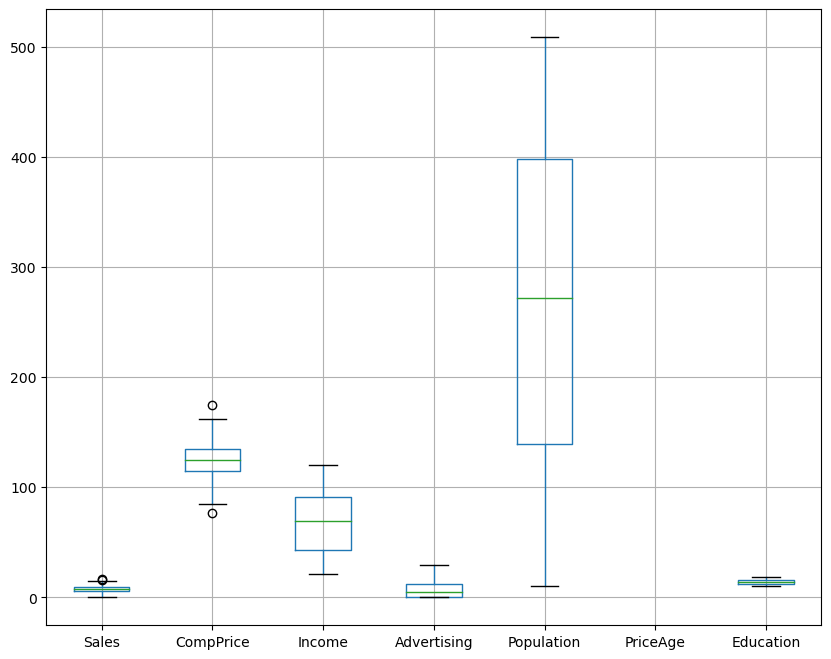

In [7]:
#plot boxplot to visualize distribution of all the numerical columnns at once..
plt.figure(figsize=(10,8))
pd.DataFrame(data=data,columns=['Sales','CompPrice','Income','Advertising','Population','Price''Age','Education']).boxplot()

The distribution of segment population is widely distributed over all other segments.

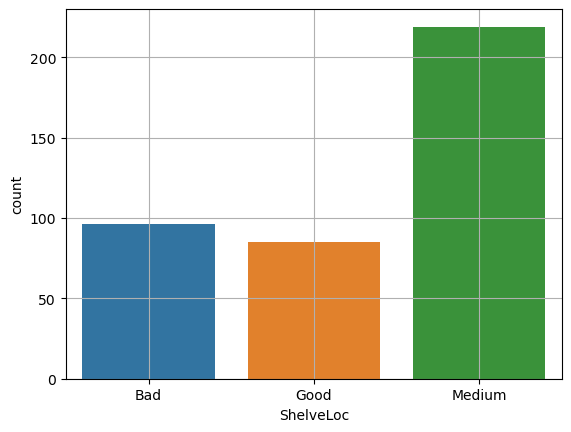

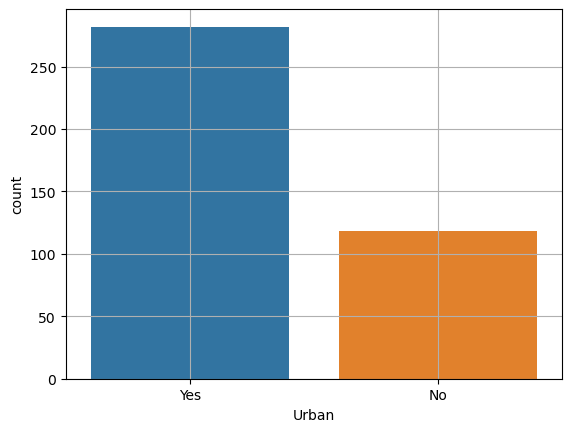

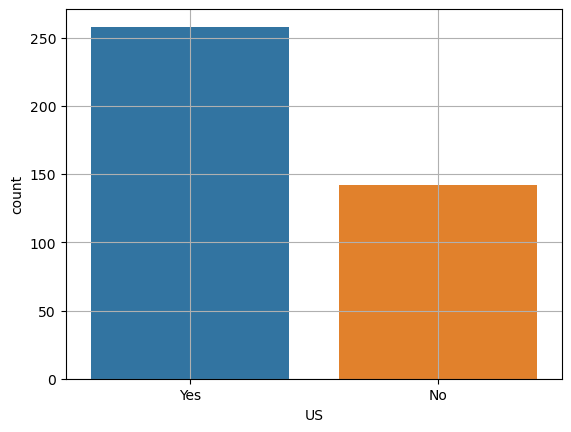

In [40]:
#count plot
sns.countplot(data['ShelveLoc'])
plt.grid(True)
plt.show()

sns.countplot(data['Urban'])
plt.grid(True)
plt.show()

sns.countplot(data['US'])
plt.grid(True)
plt.show()

From the above plot we can see that majority Shelf location is at medium height, Majority Sales comes from Urban location and Majority Stores are in US

In [8]:
# Creating copy of a datset
data2 = data.copy()
data2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [9]:
# descriptive statastics 
data2.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [10]:
# converting catogorical data to numeric data
data2['US'] = data2['US'].map({'Yes':1,'No': 0})
data2['Urban'] = data2['Urban'].map({'Yes':1,'No': 0})
data2['ShelveLoc'] = data2['ShelveLoc'].map({'Bad':0,'Good':2,'Medium':1})
data2

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,1,1
396,6.14,139,23,3,37,120,1,55,11,0,1
397,7.41,162,26,12,368,159,1,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [11]:
# converting the catogorical data to numeric accoring to problem statement
data2['sales'] = 'Small'
data2.loc[data2['Sales'] >= 7.49,'sales'] = 'Large'
data2.drop(['Sales'],axis = 1,inplace = True)

In [12]:
data2.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,1,1,Large
1,111,48,16,260,83,2,65,10,1,1,Large
2,113,35,10,269,80,1,59,12,1,1,Large
3,117,100,4,466,97,1,55,14,1,1,Small
4,141,64,3,340,128,0,38,13,1,0,Small


In [13]:
# input variables
X = data2.iloc[:,0:10]
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,1,59,12,1,1
3,117,100,4,466,97,1,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1
396,139,23,3,37,120,1,55,11,0,1
397,162,26,12,368,159,1,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [14]:
# Target Variables
Y = data2.iloc[:,10]
Y

0      Large
1      Large
2      Large
3      Small
4      Small
       ...  
395    Large
396    Small
397    Small
398    Small
399    Large
Name: sales, Length: 400, dtype: object

In [15]:
X.shape,Y.shape

((400, 10), (400,))

In [16]:
# Splitting the data on train and test 
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.33,random_state = 0)

In [17]:
# bulding model 
RD = RandomForestClassifier(n_estimators=100,max_features=3)
RD.fit(x_train,y_train)# fitting on train data

RandomForestClassifier(max_features=3)

In [18]:
predict = RD.predict(x_test)# predicting on data
np.mean(predict==y_test)*100 


83.33333333333334

In [19]:
predict

array(['Small', 'Large', 'Large', 'Small', 'Small', 'Large', 'Large',
       'Small', 'Small', 'Small', 'Small', 'Small', 'Small', 'Large',
       'Small', 'Small', 'Large', 'Large', 'Small', 'Small', 'Small',
       'Small', 'Small', 'Large', 'Small', 'Large', 'Small', 'Small',
       'Large', 'Small', 'Large', 'Large', 'Large', 'Large', 'Small',
       'Large', 'Small', 'Small', 'Small', 'Large', 'Small', 'Large',
       'Small', 'Large', 'Small', 'Small', 'Small', 'Large', 'Large',
       'Large', 'Small', 'Large', 'Large', 'Large', 'Small', 'Large',
       'Small', 'Large', 'Large', 'Small', 'Small', 'Large', 'Small',
       'Small', 'Large', 'Large', 'Large', 'Large', 'Large', 'Small',
       'Large', 'Large', 'Large', 'Small', 'Small', 'Large', 'Large',
       'Large', 'Large', 'Large', 'Small', 'Large', 'Small', 'Small',
       'Large', 'Large', 'Small', 'Small', 'Large', 'Large', 'Large',
       'Small', 'Large', 'Small', 'Large', 'Small', 'Large', 'Small',
       'Large', 'Lar

In [20]:
df_t = pd.DataFrame({'Actual':y_test, 'Predicted':predict})
df_t # actual vs predicted

,Actual,Predicted
132,Large,Small
309,Large,Large
341,Small,Large
196,Small,Small
246,Small,Small
...,...,...
252,Large,Small
350,Large,Large
168,Small,Large
150,Large,Large


In [21]:
RD.feature_importances_ # feature importance 

array([0.1279191 , 0.09228664, 0.09147477, 0.09497453, 0.24157655,
       0.12877224, 0.14316458, 0.05125486, 0.01624985, 0.01232687])

In [22]:
# dataframe for better understanding
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': RD.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi

,feature,importance
4,Price,0.241577
6,Age,0.143165
5,ShelveLoc,0.128772
0,CompPrice,0.127919
3,Population,0.094975
1,Income,0.092287
2,Advertising,0.091475
7,Education,0.051255
8,Urban,0.016250
9,US,0.012327


### from above datafram we can see price is the most important feature which is affecting the sales

## Confusion Matrix, Accuracy and f1 score

In [41]:
y_pred = RD.predict(x_test)

In [42]:
accuracy_score(y_test,y_pred)

0.8333333333333334

In [43]:
confusion_matrix(y_test,y_pred)

array([[58, 12],
       [10, 52]], dtype=int64)

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Large       0.85      0.83      0.84        70
       Small       0.81      0.84      0.83        62

    accuracy                           0.83       132
   macro avg       0.83      0.83      0.83       132
weighted avg       0.83      0.83      0.83       132

